In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scikit_posthocs as sp

# Dataframes creation

In [3]:
path_AedesXOutros_IPhone_google = 'results\AedesXOutros_IPhone7\ResultTable_googlenet.csv'
path_AedesXOutros_IPhone_resnet = 'results\AedesXOutros_IPhone7\ResultTable_resnet50.csv'
path_AedesXOutros_IPhone_vgg = 'results\AedesXOutros_IPhone7\ResultTable_vgg16.csv'

path_AedesXOutros_MotoX2_google = 'results\AedesXOutros_MotoX2\ResultTable_googlenet.csv'
path_AedesXOutros_MotoX2_resnet = 'results\AedesXOutros_MotoX2\ResultTable_resnet50.csv'
path_AedesXOutros_MotoX2_vgg = 'results\AedesXOutros_MotoX2\ResultTable_vgg16.csv'

path_AedesXOutros_MotoX2_IPhone_google = 'results\AedesXOutros_MotoX2_IPhone7\ResultTable_googlenet.csv'
path_AedesXOutros_MotoX2_IPhone_resnet = 'results\AedesXOutros_MotoX2_IPhone7\ResultTable_resnet50.csv'
path_AedesXOutros_MotoX2_IPhone_vgg = 'results\AedesXOutros_MotoX2_IPhone7\ResultTable_vgg16.csv'

path_AedesXOutros_Park_google = 'results\AedesXOutros_Park\ResultTable_googlenet.csv'
path_AedesXOutros_Park_resnet = 'results\AedesXOutros_Park\ResultTable_resnet50.csv'
path_AedesXOutros_Park_vgg = 'results\AedesXOutros_Park\ResultTable_vgg16.csv'

path_AedesXOutrosFemea_MotoX2_google = 'results\AedesXOutrosFemea_MotoX2\ResultTable_googlenet.csv'
path_AedesXOutrosFemea_MotoX2_resnet = 'results\AedesXOutrosFemea_MotoX2\ResultTable_resnet50.csv'
path_AedesXOutrosFemea_MotoX2_vgg = 'results\AedesXOutrosFemea_MotoX2\ResultTable_vgg16.csv'

path_AegyptiXOutros_MotoX2_google = 'results\AegyptiXOutros_MotoX2\ResultTable_googlenet.csv'
path_AegyptiXOutros_MotoX2_resnet = 'results\AegyptiXOutros_MotoX2\ResultTable_resnet50.csv'
path_AegyptiXOutros_MotoX2_vgg = 'results\AegyptiXOutros_MotoX2\ResultTable_vgg16.csv'

path_AegyptiXOutros_Pise_google = 'results\AegyptiXOutros_Pise\ResultTable_googlenet.csv'
path_AegyptiXOutros_Pise_resnet = 'results\AegyptiXOutros_Pise\ResultTable_resnet50.csv'
path_AegyptiXOutros_Pise_vgg = 'results\AegyptiXOutros_Pise\ResultTable_vgg16.csv'
path_AegyptiXOutros_Pise_vgg_Final = 'results\AegyptiXOutros_Pise\ResultTable_vgg16_final.csv'

path_VetorXNaoVetor_Park_google = 'results\AegyptiXOutros_Pise\ResultTable_googlenet.csv'
path_VetorXNaoVetor_Park_resnet = 'results\VetorXNaoVetor_Park\ResultTable_resnet50.csv'
path_VetorXNaoVetor_Park_vgg = 'results\AegyptiXOutros_Pise\ResultTable_vgg16.csv'

In [3]:
dts_df = pd.read_csv(path_AedesXOutros_IPhone_google)
dts_df

,sample,test_size,alpha,actual_prop,pred_prop,abs_error,acc,f_score,thr,acc2,thr2,quantifier,model,pt
0,1,10,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.5,CC,googlenet,1
1,1,10,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.5,ACC,googlenet,1
2,1,10,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.5,X,googlenet,1
3,1,10,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.5,MAX,googlenet,1
4,1,10,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.5,T50,googlenet,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,10,100,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.5,MS2,googlenet,1
17636,10,100,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.5,EMQ,googlenet,1
17637,10,100,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.5,FM,googlenet,1
17638,10,100,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.5,FMM,googlenet,1


# Checking for missing values

In [6]:
# Talvez tirar MS2 e utilizar MS. dts MS2 com NaN(AedesXOutros_Park_vgg, AegyptiXOutros_Pise_vgg)
#                                 dts SMM com NaN(AegyptiXOutros_Pise_vgg)

df_NaN = pd.read_csv(path_AedesXOutros_MotoX2_vgg)
if df_NaN.isna().any().any():
    print("There are NaN values in the DataFrame")
else:
    print("There are no NaN values in the DataFrame")

df_NaN.isna()

rows_with_nan = df_NaN[df_NaN.isna().any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nan)

quantifiers_NaN = np.unique(rows_with_nan['quantifier'])
print(quantifiers_NaN)

There are no NaN values in the DataFrame
Rows with NaN values:
Empty DataFrame
Columns: [sample, test_size, alpha, actual_prop, pred_prop, abs_error, acc, f_score, thr, acc2, thr2, quantifier, model, pt]
Index: []
[]


# Abs_errors and accuracy per model in a dataset

In [588]:
paths_dts = ['./results/AedesXOutros_IPhone7/', './results/AedesXOutros_MotoX2/', './results/AedesXOutros_MotoX2_IPhone7/',
         './results/AedesXOutros_Park/', './results/AedesXOutrosFemea_MotoX2/', './results/AegyptiXOutros_MotoX2/',
         './results/AegyptiXOutros_Pise/', './results/VetorXNaoVetor_Park/']

experiment_path = paths_dts[7]

df_google = pd.read_csv(experiment_path + 'ResultTable_googlenet.csv')
df_resnet = pd.read_csv(experiment_path + 'ResultTable_resnet50.csv')
df_vgg = pd.read_csv(experiment_path + 'ResultTable_vgg16.csv')

In [589]:
quantifiers = np.unique(df_google['quantifier'])
quantifiers

array(['ACC', 'CC', 'DyS', 'EMQ', 'FM', 'FMM', 'HDy', 'MAX', 'MS', 'MS2',
       'SMM', 'SORD', 'T50', 'X'], dtype=object)

In [590]:
abs_error_google = pd.DataFrame(columns=quantifiers)

for quant in quantifiers:
    abs_error_google[quant] = df_google[df_google['quantifier'] == quant]['abs_error'].tolist()

mean_errors_google = df_google.groupby('quantifier')['abs_error'].mean()
mean_errors_google = np.round(mean_errors_google, 4)

std_deviation_google = df_google.groupby('quantifier')['abs_error'].std()
std_deviation_google = np.round(std_deviation_google, 4)

mean_abs_error_google = pd.DataFrame(mean_errors_google) 
std_deviation_google = pd.DataFrame(std_deviation_google)

mean_abs_error_google.T
# std_deviation_google.T

quantifier,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
abs_error,0.0945,0.0945,0.0493,0.1397,0.1702,0.0944,0.0437,0.1941,0.0945,0.0945,0.0778,0.0943,0.5063,0.1941


In [591]:
accuracy_google = pd.DataFrame(columns=quantifiers)

for quant in quantifiers:
    accuracy_google[quant] = df_google[df_google['quantifier'] == quant]['acc2'].tolist()

accuracy_google

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,1.00,1.00,1.0,1.00,1.00,1.00,1.0,0.7,1.00,1.00,1.00,1.00,0.5,0.7
1,1.00,1.00,1.0,1.00,1.00,1.00,1.0,0.4,1.00,1.00,1.00,1.00,0.2,0.4
2,1.00,1.00,1.0,1.00,1.00,1.00,1.0,0.7,1.00,1.00,1.00,1.00,0.5,0.7
3,1.00,1.00,1.0,1.00,1.00,1.00,1.0,0.4,1.00,1.00,1.00,1.00,0.4,0.4
4,1.00,1.00,1.0,1.00,1.00,1.00,1.0,0.6,1.00,1.00,1.00,1.00,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.75,0.75,1.0,0.66,0.51,0.75,1.0,1.0,0.75,0.75,0.76,0.75,1.0,1.0
1256,0.79,0.79,1.0,0.73,0.56,0.79,1.0,1.0,0.79,0.79,0.79,0.79,1.0,1.0
1257,0.81,0.81,1.0,0.81,0.65,0.81,1.0,1.0,0.81,0.81,0.82,0.81,1.0,1.0
1258,0.88,0.88,1.0,0.92,0.73,0.88,1.0,1.0,0.88,0.88,0.87,0.88,1.0,1.0


In [592]:
abs_error_resnet = pd.DataFrame(columns=quantifiers)

for quant in quantifiers:
    abs_error_resnet[quant] = df_resnet[df_resnet['quantifier'] == quant]['abs_error'].tolist()

mean_errors_resnet = df_resnet.groupby('quantifier')['abs_error'].mean()
mean_errors_resnet = np.round(mean_errors_resnet, 4)

std_deviation_resnet = df_resnet.groupby('quantifier')['abs_error'].std()
std_deviation_resnet = np.round(std_deviation_resnet, 4)

mean_abs_error_resnet = pd.DataFrame(mean_errors_resnet)
std_deviation_resnet = pd.DataFrame(std_deviation_resnet)

mean_abs_error_resnet.T
# std_deviation_resnet.T

quantifier,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
abs_error,0.0,0.0,0.0016,0.0081,0.0,0.0,0.0212,0.0017,0.0,0.0,0.001,0.0,0.5063,0.0017


In [593]:
accuracy_resnet = pd.DataFrame(columns=quantifiers)

for quant in quantifiers:
    accuracy_resnet[quant] = df_resnet[df_resnet['quantifier'] == quant]['acc2'].tolist()

accuracy_resnet

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.9,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.9,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.9,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.9,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0
1256,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0
1257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0
1258,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0


In [594]:
abs_error_vgg = pd.DataFrame(columns=quantifiers)

for quant in quantifiers:
    abs_error_vgg[quant] = df_vgg[df_vgg['quantifier'] == quant]['abs_error'].tolist()

mean_errors_vgg = df_vgg.groupby('quantifier')['abs_error'].mean()
mean_errors_vgg = np.round(mean_errors_vgg, 4)

std_deviation_vgg = df_vgg.groupby('quantifier')['abs_error'].std()
std_deviation_vgg = np.round(std_deviation_vgg, 4)

mean_abs_error_vgg = pd.DataFrame(mean_errors_vgg)
std_deviation_vgg = pd.DataFrame(std_deviation_vgg)

mean_abs_error_vgg.T
# std_deviation_vgg.T

quantifier,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
abs_error,0.5063,0.5063,0.3276,0.5063,0.5063,0.5063,0.3014,0.5063,0.5063,0.5063,0.377,0.5063,0.5063,0.5063


In [595]:
accuracy_vgg = pd.DataFrame(columns=quantifiers)

for quant in quantifiers:
    accuracy_vgg[quant] = df_vgg[df_vgg['quantifier'] == quant]['acc2'].tolist()

accuracy_vgg

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1256,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1257,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1258,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Friedman/Nemenyi test between models within a quantifier per dataset

In [596]:
# celula criada para testes, apagar depois!!

model_test_df = pd.DataFrame(columns=['googlenet', 'resnet50', 'vgg16'])



model_test_df['googlenet'] = abs_error_google[quant]
model_test_df['resnet50'] = abs_error_resnet[quant]
model_test_df['vgg16'] = abs_error_vgg[quant]

model_test_df

,googlenet,resnet50,vgg16
0,0.3,0.0,1.0
1,0.7,0.0,1.0
2,0.3,0.0,1.0
3,0.6,0.0,1.0
4,0.4,0.0,1.0
...,...,...,...
1255,0.0,0.0,0.0
1256,0.0,0.0,0.0
1257,0.0,0.0,0.0
1258,0.0,0.0,0.0


In [597]:
results = []

for quant in quantifiers:

    model_test_df = pd.DataFrame(columns=['googlenet', 'resnet50', 'vgg16'])

    model_test_df['googlenet'] = abs_error_google[quant]
    model_test_df['resnet50'] = abs_error_resnet[quant]
    model_test_df['vgg16'] = abs_error_vgg[quant]

    result = sp.posthoc_nemenyi_friedman(model_test_df)
    results.append(result)

quantifier_index = 13
model_index = 1
print(quantifiers[quantifier_index])
print(results[quantifier_index].iloc[model_index] < 0.05)

X
googlenet     True
resnet50     False
vgg16         True
Name: resnet50, dtype: bool


# Best classifier per quantifier in a dataset

In [16]:
best_classifiers = pd.DataFrame(columns=quantifiers)
best_classifiers

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X


In [91]:
result = []

for quant in quantifiers:
    mean_abs_errors = np.array([float(mean_abs_error_google.T[quant]), float(mean_abs_error_resnet.T[quant]), float(mean_abs_error_vgg.T[quant])])
    best_index = np.argmin(mean_abs_errors)
    print(mean_abs_errors)
    print(best_index)
    result.append(best_index)

result = pd.DataFrame([result], columns=quantifiers)
print(result)

best_classifiers = pd.concat([best_classifiers, result], ignore_index=True)
best_classifiers

[0.0945 0.     0.5063]
1
[0.0945 0.     0.5063]
1
[0.0493 0.0016 0.3276]
1
[0.1397 0.0081 0.5063]
1
[0.1702 0.     0.5063]
1
[0.0944 0.     0.5063]
1
[0.0437 0.0212 0.3014]
1
[0.1941 0.0017 0.5063]
1
[0.0945 0.     0.5063]
1
[0.0945 0.     0.5063]
1
[0.0778 0.001  0.377 ]
1
[0.0943 0.     0.5063]
1
[0.5063 0.5063 0.5063]
0
[0.1941 0.0017 0.5063]
1
   ACC  CC  DyS  EMQ  FM  FMM  HDy  MAX  MS  MS2  SMM  SORD  T50  X
0    1   1    1    1   1    1    1    1   1    1    1     1    0  1


,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,0,0,0,1,1,0,1,0,1,1,0,1,0,0
1,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,1,1
3,1,1,0,0,0,1,1,1,1,2,1,1,1,0
4,2,2,2,2,2,2,2,0,2,2,2,2,2,0
5,0,0,1,1,1,0,1,1,0,2,1,0,2,1
6,1,1,1,1,1,1,1,0,1,2,1,1,1,0
7,1,1,1,1,1,1,1,1,1,1,1,1,0,1


# Best MAE abs_error list

In [123]:
abs_error_best = pd.DataFrame(columns=quantifiers)
abs_error_best

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X


In [205]:
row_best_classifiers = best_classifiers.iloc[7]
abs_error_results = []
for quant in quantifiers:
    if row_best_classifiers[quant] == 0:
        abs_error_results.append(abs_error_google[quant])
    if row_best_classifiers[quant] == 1:
        abs_error_results.append(abs_error_resnet[quant])
    if row_best_classifiers[quant] == 2:
        abs_error_results.append(abs_error_vgg[quant])

abs_error_results = pd.DataFrame([abs_error_results], columns=quantifiers)

abs_error_best = pd.concat([abs_error_best, abs_error_results], ignore_index=True)
abs_error_best

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.01 1 0.01 2 0.01 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.01 1 0.01 2 0.01 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.00 1 0.00 2 0.01 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....
1,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.01 1 0.01 2 0.01 3 ...,0 0.08 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.01 1 0.01 2 0.01 3 ...,0 0.02 1 0.08 2 0.02 3 ...,0 0.02 1 0.02 2 0.02 3 ...,0 0.02 1 0.02 2 0.02 3 ...,0 0.01 1 0.02 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.02 1 0.08 2 0.02 3 ...
2,0 0.0 1 0.0 2 0.0 3 0....,0 0.00 1 0.00 2 0.00 3 ...,0 0.01 1 0.01 2 0.01 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.00 1 0.00 2 0.00 3 ...,0 0.01 1 0.01 2 0.01 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.00 1 0.00 2 0.00 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.00 1 0.00 2 0.00 3 ...,0 0.01 1 0.09 2 0.01 3 ...
3,0 0.20 1 0.10 2 0.20 3 ...,0 0.20 1 0.10 2 0.20 3 ...,0 0.02 1 0.17 2 0.02 3 ...,0 0.00 1 0.17 2 0.00 3 ...,0 0.09 1 0.30 2 0.20 3 ...,0 0.19 1 0.09 2 0.19 3 ...,0 0.03 1 0.04 2 0.03 3 ...,0 0.20 1 0.10 2 0.20 3 ...,0 0.20 1 0.10 2 0.19 3 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.24 1 0.12 2 0.18 3 ...,0 0.20 1 0.10 2 0.20 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.19 1 0.40 2 0.30 3 ...
4,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.02 1 0.02 2 0.02 3 ...,0 0.02 1 0.02 2 0.02 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.01 1 0.01 2 0.01 3 ...,0 0.00 1 0.00 2 0.00 3 ...
5,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.13 1 0.20 2 0.45 3 ...,0 0.00 1 0.00 2 0.40 3 ...,0 0.16 1 0.32 2 0.65 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.19 1 0.24 2 0.61 3 ...,0 0.19 1 0.35 2 0.67 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.09 1 0.09 2 0.09 3 ...,0 0.06 1 0.11 2 0.27 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.09 1 0.09 2 0.09 3 ...,0 0.19 1 0.35 2 0.68 3 ...
6,0 0.10 1 0.20 2 0.10 3 ...,0 0.10 1 0.20 2 0.10 3 ...,0 0.01 1 0.03 2 0.01 3 ...,0 0.00 1 0.16 2 0.00 3 ...,0 0.10 1 0.20 2 0.10 3 ...,0 0.09 1 0.20 2 0.10 3 ...,0 0.02 1 0.03 2 0.01 3 ...,0 0.20 1 0.30 2 0.10 3 ...,0 0.10 1 0.20 2 0.10 3 ...,0 NaN 1 NaN 2 NaN 3 NaN 4 ...,0 0.08 1 0.21 2 0.11 3 ...,0 0.09 1 0.20 2 0.10 3 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.20 1 0.30 2 0.10 3 ...
7,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.01 1 0.01 2 0.01 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.00 1 0.00 2 0.00 3 ...,0 0.0 1 0.0 2 0.0 3 0....,0 1.0 1 1.0 2 1.0 3 1....,0 0.0 1 0.0 2 0.0 3 0....


# Best MAE mean and std

In [600]:
mae_best = abs_error_best.applymap(lambda x: np.round(np.mean(x), 4))
mae_best.drop(['MS2', 'FM'], axis=1, inplace=True)
mae_best

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.0000,0.0000,0.0050,0.0025,0.0003,0.0102,0.0047,0.0003,0.0053,0.0006,0.0355,0.0047
1,0.0191,0.0145,0.0175,0.0149,0.0178,0.0231,0.0227,0.0166,0.0180,0.0156,0.0543,0.0210
2,0.0058,0.0016,0.0101,0.0034,0.0064,0.0093,0.0085,0.0073,0.0081,0.0072,0.0316,0.0097
3,0.0678,0.0649,0.0562,0.0451,0.0610,0.0692,0.0731,0.0671,0.0712,0.0673,0.0877,0.0829
4,0.0216,0.0206,0.0216,0.0184,0.0236,0.0196,0.0079,0.0226,0.0235,0.0225,0.0254,0.0079
5,0.4937,0.4937,0.1176,0.1522,0.4937,0.1496,0.2574,0.4937,0.2399,0.4937,0.4173,0.2585
6,0.1156,0.1156,0.0979,0.0800,0.1152,0.0885,0.0925,0.1154,0.1198,0.1156,0.3120,0.0925
7,0.0000,0.0000,0.0016,0.0081,0.0000,0.0212,0.0017,0.0000,0.0010,0.0000,0.5063,0.0017


In [601]:
std_best = abs_error_best.applymap(lambda x: np.round(np.std(x), 4))
std_best.drop('MS2', axis=1, inplace=True)
std_best

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.0000,0.0000,0.0080,0.0074,0.0000,0.0018,0.0118,0.0129,0.0018,0.0068,0.0023,0.0296,0.0129
1,0.0211,0.0235,0.0199,0.0202,0.0202,0.0200,0.0268,0.0277,0.0187,0.0192,0.0191,0.0570,0.0251
2,0.0079,0.0074,0.0116,0.0089,0.0068,0.0075,0.0121,0.0122,0.0076,0.0078,0.0073,0.0310,0.0140
3,0.0603,0.0606,0.0540,0.0470,0.0590,0.0568,0.0551,0.0640,0.0596,0.0595,0.0600,0.0807,0.0674
4,0.0243,0.0296,0.0278,0.0263,0.0261,0.0251,0.0253,0.0170,0.0238,0.0250,0.0253,0.0268,0.0170
5,0.3031,0.3031,0.1113,0.1412,0.1627,0.3031,0.1377,0.1710,0.3031,0.1633,0.3031,0.2840,0.1753
6,0.0874,0.0874,0.0774,0.0686,0.0784,0.0872,0.0763,0.0744,0.0867,0.0849,0.0868,0.2091,0.0744
7,0.0000,0.0000,0.0044,0.0106,0.0000,0.0000,0.0238,0.0078,0.0000,0.0030,0.0000,0.3031,0.0078


In [602]:
ranking_quantifiers = mae_best.T.rank()
mean_rank_sorted = ranking_quantifiers.T.mean().round(3).sort_values()
mean_rank_sorted

EMQ      3.500
CC       4.312
DyS      5.812
FMM      5.812
MS       5.938
ACC      6.000
SORD     6.125
MAX      6.750
X        7.125
HDy      7.250
SMM      8.000
T50     11.375
dtype: float64

In [603]:
ranking_quantifiers = ranking_quantifiers.T[mean_rank_sorted.index]
ranking_quantifiers

,EMQ,CC,DyS,FMM,MS,ACC,SORD,MAX,X,HDy,SMM,T50
0,6.0,1.5,9.0,3.5,3.5,1.5,5.0,7.5,7.5,11.0,10.0,12.0
1,2.0,1.0,5.0,6.0,4.0,8.0,3.0,10.0,9.0,11.0,7.0,12.0
2,2.0,1.0,11.0,4.0,6.0,3.0,5.0,8.0,10.0,9.0,7.0,12.0
3,1.0,4.0,2.0,3.0,5.0,7.0,6.0,10.0,11.0,8.0,9.0,12.0
4,3.0,5.0,6.5,11.0,9.0,6.5,8.0,1.5,1.5,4.0,10.0,12.0
5,3.0,10.0,1.0,10.0,10.0,10.0,10.0,5.0,6.0,2.0,4.0,7.0
6,1.0,9.0,5.0,6.0,7.0,9.0,9.0,3.5,3.5,2.0,11.0,12.0
7,10.0,3.0,7.0,3.0,3.0,3.0,3.0,8.5,8.5,11.0,6.0,12.0


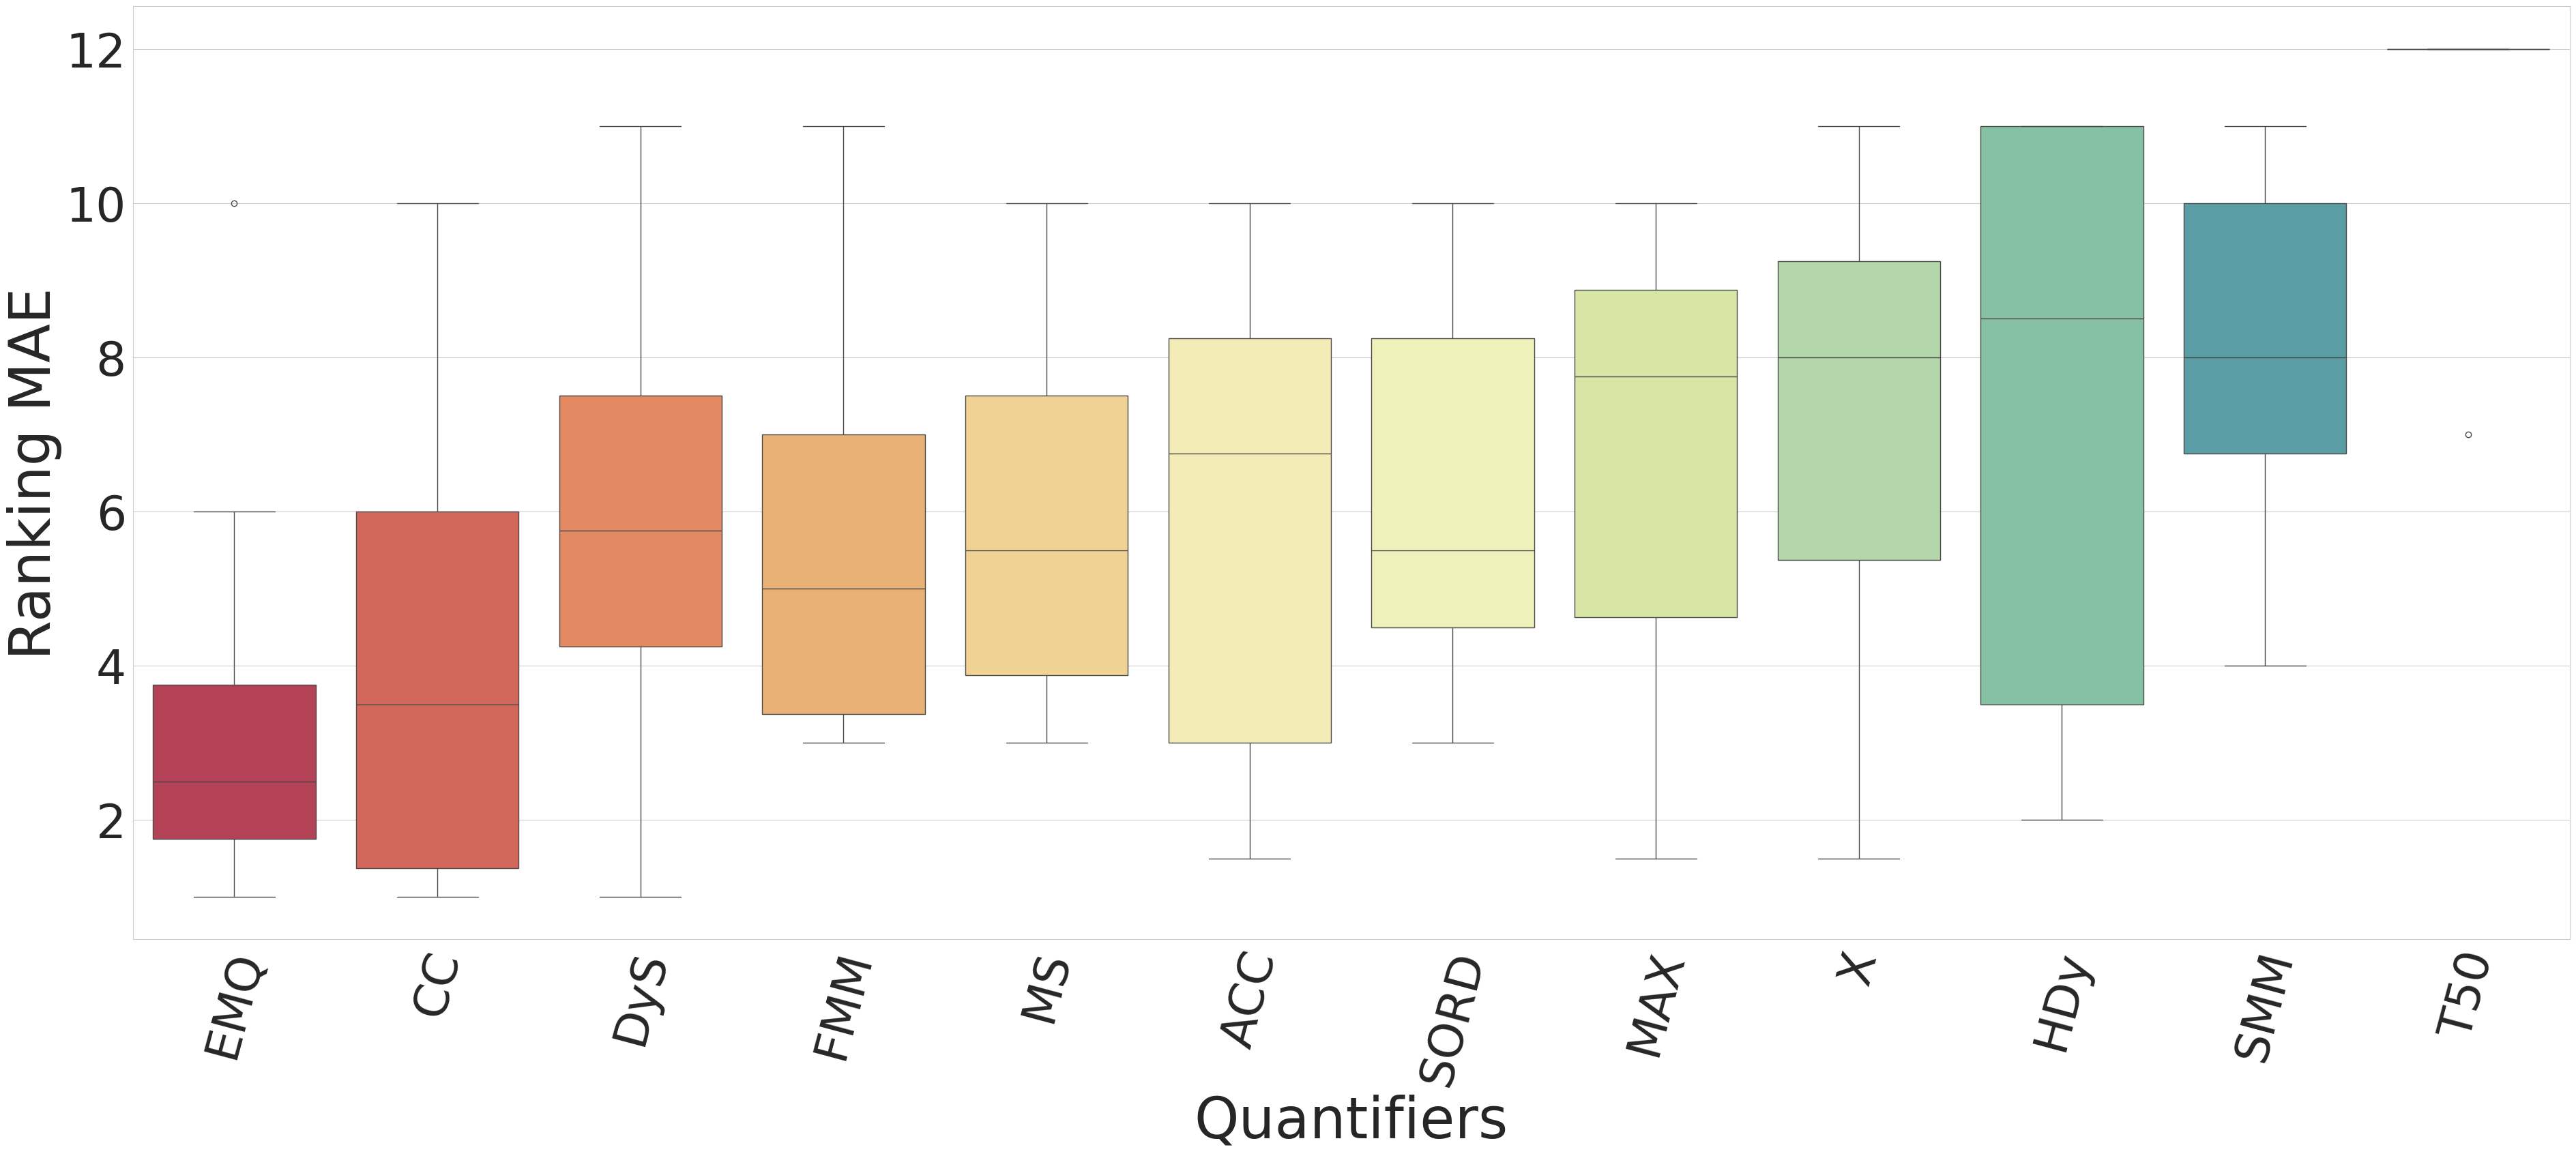

In [604]:
sample = ranking_quantifiers
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .23
plt_width = 38
plt_heigth = 18
plot_rotation = 75
axis_font_size = 50
labels_size = 60

with sns.axes_style("whitegrid"), sns.color_palette('Spectral', ranking_quantifiers.shape[1]):
    plt.figure(figsize=(plt_width,plt_heigth))
    plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
    ax=sns.boxplot(data=sample)
    plt.xticks(rotation = plot_rotation, fontsize = axis_font_size)
    plt.yticks(fontsize = axis_font_size)
    ax.set_xlabel("Quantifiers",fontsize=labels_size)
    ax.set_ylabel("Ranking MAE",fontsize=labels_size)

plt.show()
# plt.savefig('ranking_mae_quantifiers.pdf')

# MAE significance test

In [306]:
mae_test = pd.DataFrame(columns=quantifiers)
mae_test

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X


## DTS1

In [401]:
listas_dts1 = abs_error_best.iloc[0]

data_dts1 = {}

for quant in quantifiers:
    data_dts1[quant] = listas_dts1[quant]

mae_test_dts1 = pd.DataFrame(data_dts1)
mae_test_dts1.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts1

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.0
1,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.0
2,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
3,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
4,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1256,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1257,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1258,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0


In [458]:
result_dts1 = sp.posthoc_nemenyi_friedman(mae_test_dts1)
differences_dts1 = result_dts1['ACC'] < 0.05
print([quantifier for quantifier, diff in differences_dts1.items() if diff])

['DyS', 'EMQ', 'HDy', 'MAX', 'SMM', 'T50', 'X']


## DTS2

In [408]:
listas_dts2 = abs_error_best.iloc[1]

data_dts2 = {}

for quant in quantifiers:
    data_dts2[quant] = listas_dts2[quant]

mae_test_dts2 = pd.DataFrame(data_dts2)
mae_test_dts2.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts2

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.00,0.00,0.01,0.08,0.00,0.01,0.02,0.02,0.01,0.00,0.00,0.02
1,0.00,0.00,0.01,0.00,0.00,0.01,0.08,0.02,0.02,0.00,0.00,0.08
2,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.00,0.02
3,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.00,0.02
4,0.09,0.10,0.01,0.00,0.03,0.01,0.08,0.05,0.05,0.05,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.02,0.06,0.01,0.00,0.03,0.00,0.02,0.02,0.02,0.02,0.04,0.01
1256,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
1257,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.03,0.00
1258,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [457]:
result_dts2 = sp.posthoc_nemenyi_friedman(mae_test_dts2)
differences_dts2 = result_dts2['CC'] < 0.05
print([quantifier for quantifier, diff in differences_dts2.items() if diff])

['ACC', 'DyS', 'FMM', 'HDy', 'MAX', 'MS', 'SMM', 'SORD', 'T50', 'X']


## DTS3

In [414]:
listas_dts3 = abs_error_best.iloc[2]

data_dts3 = {}

for quant in quantifiers:
    data_dts3[quant] = listas_dts3[quant]

mae_test_dts3 = pd.DataFrame(data_dts3)
mae_test_dts3.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts3

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.00,0.0,0.00,0.01
1,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.00,0.0,0.00,0.09
2,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.00,0.0,0.00,0.01
3,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.01,0.0,0.00,0.01
4,0.0,0.00,0.01,0.0,0.00,0.01,0.0,0.0,0.01,0.0,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.0,0.01,0.00,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1256,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1257,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1258,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00


In [456]:
result_dts3 = sp.posthoc_nemenyi_friedman(mae_test_dts3)
differences_dts3 = result_dts3['CC'] < 0.05
print([quantifier for quantifier, diff in differences_dts3.items() if diff])

['ACC', 'DyS', 'EMQ', 'FMM', 'HDy', 'MAX', 'MS', 'SMM', 'SORD', 'T50', 'X']


## DTS4

In [416]:
listas_dts4 = abs_error_best.iloc[3]

data_dts4 = {}

for quant in quantifiers:
    data_dts4[quant] = listas_dts4[quant]

mae_test_dts4 = pd.DataFrame(data_dts4)
mae_test_dts4.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts4

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.20,0.20,0.02,0.00,0.19,0.03,0.20,0.20,0.24,0.20,0.00,0.19
1,0.10,0.10,0.17,0.17,0.09,0.04,0.10,0.10,0.12,0.10,0.00,0.40
2,0.20,0.20,0.02,0.00,0.19,0.03,0.20,0.19,0.18,0.20,0.00,0.30
3,0.20,0.20,0.03,0.00,0.19,0.04,0.20,0.20,0.22,0.20,0.00,0.30
4,0.20,0.20,0.02,0.00,0.19,0.17,0.20,0.20,0.21,0.20,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.03,0.04,0.09,0.00,0.04,0.00,0.03,0.03,0.02,0.02,0.05,0.10
1256,0.04,0.05,0.11,0.05,0.05,0.00,0.03,0.04,0.05,0.04,0.21,0.10
1257,0.05,0.06,0.07,0.02,0.06,0.00,0.05,0.05,0.05,0.05,0.17,0.10
1258,0.01,0.02,0.07,0.02,0.02,0.00,0.01,0.01,0.02,0.01,0.15,0.08


In [455]:
result_dts4 = sp.posthoc_nemenyi_friedman(mae_test_dts4)
differences_dts4 = result_dts4['EMQ'] < 0.05
print([quantifier for quantifier, diff in differences_dts4.items() if diff])

['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'SMM', 'SORD', 'T50', 'X']


## DTS5

In [426]:
listas_dts5 = abs_error_best.iloc[4]

data_dts5 = {}

for quant in quantifiers:
    data_dts5[quant] = listas_dts5[quant]

mae_test_dts5 = pd.DataFrame(data_dts5)
mae_test_dts5.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts5

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.00,0.02,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02
1256,0.01,0.04,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.00,0.02
1257,0.02,0.05,0.02,0.03,0.03,0.03,0.01,0.02,0.03,0.03,0.02,0.01
1258,0.00,0.03,0.02,0.03,0.01,0.02,0.03,0.01,0.01,0.01,0.00,0.03


In [454]:
result_dts5 = sp.posthoc_nemenyi_friedman(mae_test_dts5)
differences_dts5 = result_dts5['MAX'] < 0.05
print([quantifier for quantifier, diff in differences_dts5.items() if diff])

['ACC', 'CC', 'DyS', 'EMQ', 'FMM', 'HDy', 'MS', 'SMM', 'SORD', 'T50']


## DTS6

In [428]:
listas_dts6 = abs_error_best.iloc[5]

data_dts6 = {}

for quant in quantifiers:
    data_dts6[quant] = listas_dts6[quant]

mae_test_dts6 = pd.DataFrame(data_dts6)
mae_test_dts6.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts6

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.0,0.0,0.13,0.00,0.0,0.19,0.19,0.0,0.06,0.0,0.09,0.19
1,0.0,0.0,0.20,0.00,0.0,0.24,0.35,0.0,0.11,0.0,0.09,0.35
2,0.0,0.0,0.45,0.40,0.0,0.61,0.67,0.0,0.27,0.0,0.09,0.68
3,0.0,0.0,0.29,0.20,0.0,0.33,0.51,0.0,0.22,0.0,0.09,0.52
4,0.0,0.0,0.55,0.48,0.0,0.52,0.83,0.0,0.31,0.0,0.09,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.0,1.0,0.00,0.00,1.0,0.03,0.00,1.0,0.55,1.0,0.91,0.00
1256,1.0,1.0,0.01,0.00,1.0,0.04,0.00,1.0,0.55,1.0,0.91,0.00
1257,1.0,1.0,0.01,0.00,1.0,0.04,0.00,1.0,0.55,1.0,0.91,0.00
1258,1.0,1.0,0.01,0.00,1.0,0.04,0.00,1.0,0.55,1.0,0.91,0.00


In [453]:
result_dts6 = sp.posthoc_nemenyi_friedman(mae_test_dts6)
differences_dts6 = result_dts6['DyS'] < 0.05
print([quantifier for quantifier, diff in differences_dts6.items() if diff])

['ACC', 'CC', 'EMQ', 'FMM', 'HDy', 'MAX', 'MS', 'SMM', 'SORD', 'T50', 'X']


## DTS7

In [431]:
listas_dts7 = abs_error_best.iloc[6]

data_dts7 = {}

for quant in quantifiers:
    data_dts7[quant] = listas_dts7[quant]

mae_test_dts7 = pd.DataFrame(data_dts7)
mae_test_dts7.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts7

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.10,0.10,0.01,0.00,0.09,0.02,0.20,0.10,0.08,0.09,0.00,0.20
1,0.20,0.20,0.03,0.16,0.20,0.03,0.30,0.20,0.21,0.20,0.00,0.30
2,0.10,0.10,0.01,0.00,0.10,0.01,0.10,0.10,0.11,0.10,0.00,0.10
3,0.20,0.20,0.17,0.17,0.20,0.16,0.10,0.20,0.22,0.20,0.14,0.10
4,0.10,0.10,0.02,0.05,0.10,0.02,0.20,0.10,0.11,0.10,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.20,0.20,0.14,0.06,0.20,0.03,0.17,0.20,0.20,0.20,0.56,0.17
1256,0.19,0.19,0.13,0.08,0.19,0.07,0.20,0.19,0.22,0.19,0.64,0.20
1257,0.24,0.24,0.13,0.10,0.24,0.06,0.11,0.24,0.26,0.24,0.60,0.11
1258,0.21,0.21,0.13,0.07,0.21,0.07,0.20,0.21,0.23,0.21,0.60,0.20


In [452]:
result_dts7 = sp.posthoc_nemenyi_friedman(mae_test_dts7)
differences_dts7 = result_dts7['EMQ'] < 0.05
print([quantifier for quantifier, diff in differences_dts7.items() if diff])

['ACC', 'CC', 'DyS', 'FMM', 'HDy', 'MAX', 'MS', 'SMM', 'SORD', 'T50', 'X']


## DTS8

In [433]:
listas_dts8 = abs_error_best.iloc[7]

data_dts8 = {}

for quant in quantifiers:
    data_dts8[quant] = listas_dts8[quant]

mae_test_dts8 = pd.DataFrame(data_dts8)
mae_test_dts8.drop(['MS2','FM'], axis=1, inplace=True)
mae_test_dts8

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
1,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
2,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
3,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
4,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0
1256,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0
1257,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0
1258,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [450]:
result_dts8 = sp.posthoc_nemenyi_friedman(mae_test_dts8)
differences_dts8 = result_dts8['ACC'] < 0.05
print([quantifier for quantifier, diff in differences_dts8.items() if diff])

['DyS', 'EMQ', 'HDy', 'SMM', 'T50']


# Best accuracy list

In [217]:
accuracy_best = pd.DataFrame(columns=quantifiers)
accuracy_best

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X


In [288]:
row_best_classifiers = best_classifiers.iloc[7]
row_best_classifiers
accuracy_results = []
for quant in quantifiers:
    if row_best_classifiers[quant] == 0:
        accuracy_results.append(accuracy_google[quant])
    if row_best_classifiers[quant] == 1:
        accuracy_results.append(accuracy_resnet[quant])
    if row_best_classifiers[quant] == 2:
        accuracy_results.append(accuracy_vgg[quant])

accuracy_results = pd.DataFrame([accuracy_results], columns=quantifiers)

accuracy_best = pd.concat([accuracy_best, accuracy_results], ignore_index=True)
accuracy_best

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....
1,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 0.9 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 0.90 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 0.90 2 1.00 3 ...
2,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 1.00 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 1.00 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 1.00 3 ...,0 1.0 1 0.9 2 1.0 3 1....
3,0 0.80 1 0.90 2 0.80 3 ...,0 0.80 1 0.90 2 0.80 3 ...,0 1.00 1 0.80 2 1.00 3 ...,0 1.00 1 0.80 2 1.00 3 ...,0 0.90 1 0.70 2 0.80 3 ...,0 0.80 1 0.90 2 0.80 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 0.80 1 0.90 2 0.80 3 ...,0 0.80 1 0.90 2 0.80 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 0.80 1 0.90 2 0.80 3 ...,0 0.80 1 0.90 2 0.80 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 0.80 1 0.60 2 0.70 3 ...
4,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 1.00 2 1.00 3 ...
5,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 0.30 3 ...,0 1.0 1 1.0 2 0.3 3 1....,0 1.0 1 0.5 2 0.3 3 0....,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 0.30 3 ...,0 1.0 1 0.5 2 0.3 3 0....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 1.00 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 0.5 2 0.3 3 0....
6,0 0.90 1 0.80 2 0.90 3 ...,0 0.90 1 0.80 2 0.90 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 1.00 1 0.80 2 1.00 3 ...,0 0.90 1 0.80 2 0.90 3 ...,0 0.90 1 0.80 2 0.90 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 0.80 1 0.70 2 0.90 3 ...,0 0.90 1 0.80 2 0.90 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 0.90 1 0.80 2 0.90 3 ...,0 0.90 1 0.80 2 0.90 3 ...,0 1.00 1 1.00 2 1.00 3 ...,0 0.80 1 0.70 2 0.90 3 ...
7,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.0 1 1.0 2 1.0 3 1....,0 1.00 1 1.00 2 1.00 3 ...,0 1.0 1 1.0 2 1.0 3 1....,0 0.5 1 0.2 2 0.5 3 0....,0 1.0 1 1.0 2 1.0 3 1....


# Best accuracy mean and std

In [605]:
mean_accuracy_best = accuracy_best.applymap(lambda x: np.round(np.mean(x), 4))
mean_accuracy_best.drop(columns=['MS2', 'FM'], inplace=True)
mean_accuracy_best

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.0000,1.0000,0.9985,0.9988,0.9999,0.9951,0.9953,0.9999,0.9980,1.0000,0.9704,0.9953
1,0.9801,0.9818,0.9800,0.9832,0.9804,0.9738,0.9755,0.9819,0.9802,0.9822,0.9447,0.9782
2,0.9978,0.9983,0.9961,0.9974,0.9973,0.9951,0.9952,0.9974,0.9976,0.9980,0.9761,0.9930
3,0.9220,0.9218,0.8978,0.9063,0.9223,0.9208,0.9187,0.9223,0.9168,0.9224,0.8850,0.8709
4,0.9800,0.9774,0.9783,0.9795,0.9781,0.9796,0.9919,0.9789,0.9781,0.9785,0.9768,0.9919
5,0.5063,0.5063,0.7202,0.7226,0.5063,0.6959,0.6822,0.5063,0.6615,0.5063,0.5063,0.6786
6,0.8236,0.8236,0.8397,0.8511,0.8237,0.8507,0.8592,0.8237,0.8173,0.8229,0.6769,0.8592
7,1.0000,1.0000,0.9998,0.9952,1.0000,0.9792,0.9983,1.0000,0.9999,1.0000,0.5667,0.9983


In [606]:
accuracy_ranking = mean_accuracy_best.T.rank(ascending=False)
accuracy_ranking_sorted = accuracy_ranking.T.mean().round(3).sort_values()
accuracy_ranking_sorted

SORD     4.562
ACC      5.000
EMQ      5.062
MS       5.062
CC       5.500
FMM      5.938
MAX      6.375
DyS      6.875
X        7.250
SMM      7.312
HDy      7.500
T50     11.562
dtype: float64

In [607]:
accuracy_ranking = accuracy_ranking.T[accuracy_ranking_sorted.index]
accuracy_ranking

,SORD,ACC,EMQ,MS,CC,FMM,MAX,DyS,X,SMM,HDy,T50
0,2.0,2.0,6.0,4.5,2.0,4.5,9.5,7.0,9.5,8.0,11.0,12.0
1,2.0,7.0,1.0,3.0,4.0,5.0,10.0,8.0,9.0,6.0,11.0,12.0
2,2.0,3.0,5.5,5.5,1.0,7.0,9.0,8.0,11.0,4.0,10.0,12.0
3,1.0,4.0,9.0,2.5,5.0,2.5,7.0,10.0,12.0,8.0,6.0,11.0
4,7.0,3.0,5.0,6.0,11.0,9.5,1.5,8.0,1.5,9.5,4.0,12.0
5,9.5,9.5,1.0,9.5,9.5,9.5,4.0,2.0,5.0,6.0,3.0,9.5
6,10.0,8.5,3.0,6.5,8.5,6.5,1.5,5.0,1.5,11.0,4.0,12.0
7,3.0,3.0,10.0,3.0,3.0,3.0,8.5,7.0,8.5,6.0,11.0,12.0


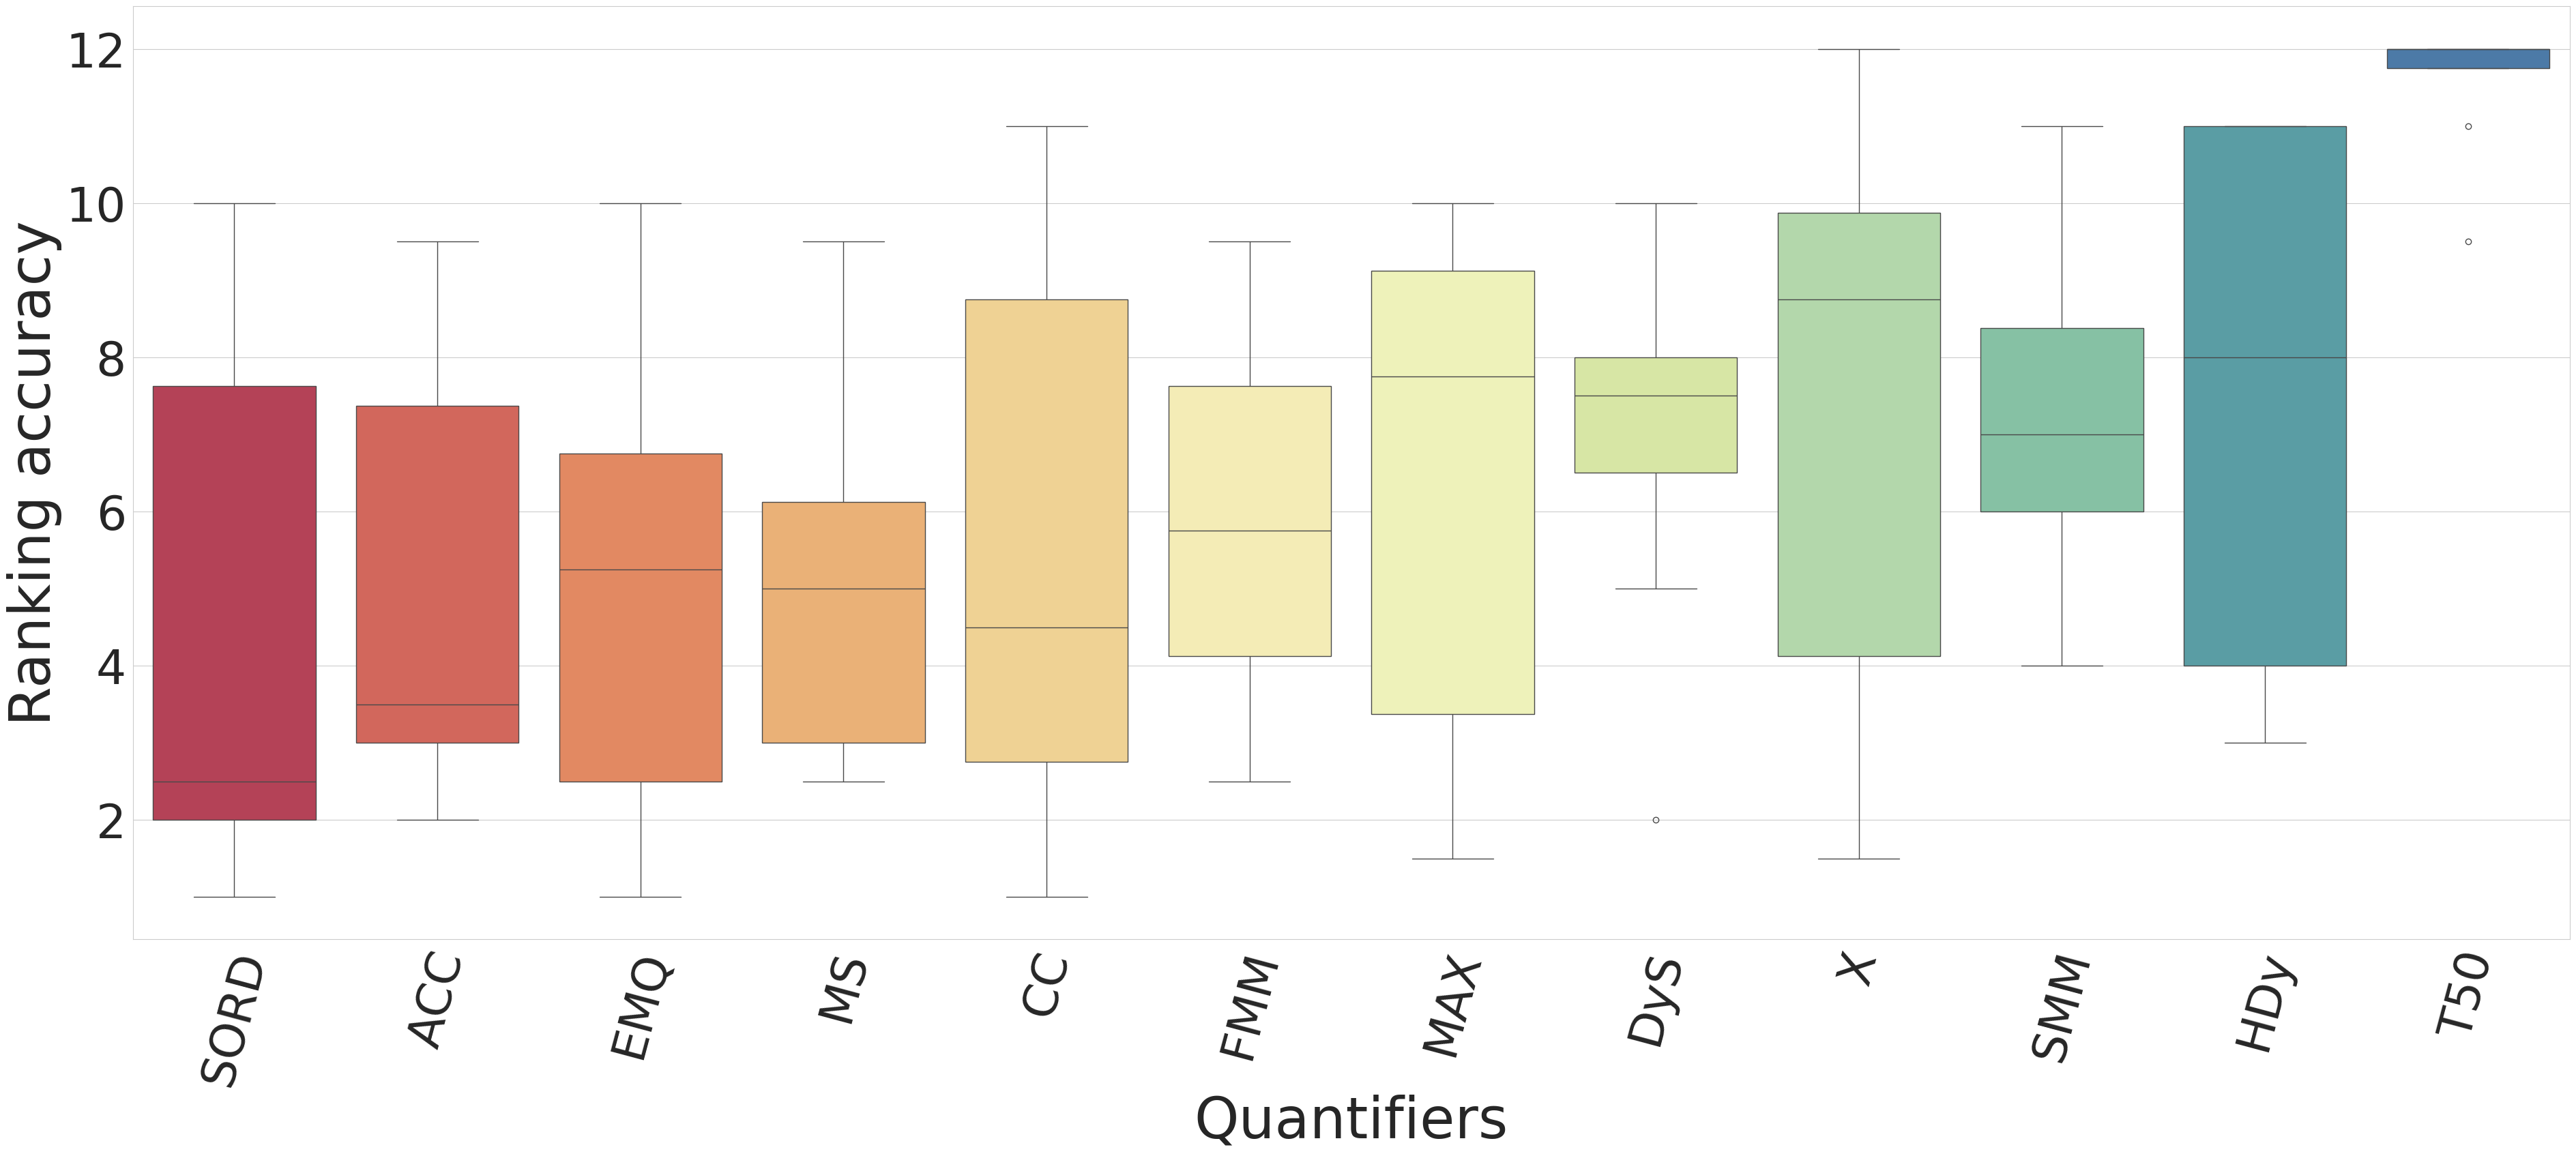

In [608]:
sample = accuracy_ranking
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .23
plt_width = 38
plt_heigth = 18
plot_rotation = 75
axis_font_size = 50
labels_size = 60

with sns.axes_style("whitegrid"), sns.color_palette('Spectral', accuracy_ranking.shape[1]):
    plt.figure(figsize=(plt_width,plt_heigth))
    plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
    ax=sns.boxplot(data=sample)
    plt.xticks(rotation = plot_rotation, fontsize = axis_font_size)
    plt.yticks(fontsize = axis_font_size)
    ax.set_xlabel("Quantifiers",fontsize=labels_size)
    ax.set_ylabel("Ranking accuracy",fontsize=labels_size)

plt.show()

In [495]:
std_accuracy_best = accuracy_best.applymap(lambda x: np.round(np.std(x), 4))
std_accuracy_best

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X
0,0.0000,0.0000,0.0083,0.0074,0.0000,0.0007,0.0134,0.0128,0.0010,0.0010,0.0071,0.0005,0.0317,0.0128
1,0.0273,0.0271,0.0284,0.0269,0.0259,0.0276,0.0347,0.0337,0.0270,0.0270,0.0272,0.0270,0.0593,0.0305
2,0.0077,0.0075,0.0130,0.0098,0.0056,0.0082,0.0147,0.0125,0.0079,0.0079,0.0075,0.0071,0.0310,0.0159
3,0.0615,0.0612,0.0707,0.0678,0.0676,0.0612,0.0614,0.0641,0.0619,0.2977,0.0630,0.0621,0.0833,0.0721
4,0.0295,0.0308,0.0304,0.0293,0.0302,0.0296,0.0297,0.0172,0.0294,0.0294,0.0291,0.0297,0.0327,0.0172
5,0.3031,0.3031,0.1815,0.1931,0.1862,0.3031,0.1840,0.1895,0.3031,0.3031,0.2135,0.3031,0.3031,0.1870
6,0.0796,0.0796,0.0840,0.0789,0.0747,0.0799,0.0867,0.0757,0.0794,0.3031,0.0785,0.0794,0.2060,0.0757
7,0.0000,0.0000,0.0033,0.0115,0.0000,0.0000,0.0290,0.0077,0.0000,0.0000,0.0011,0.0000,0.2783,0.0077


# Accuracy significance test

In [649]:
accuracy_test = pd.DataFrame(columns=quantifiers)
accuracy_test

,ACC,CC,DyS,EMQ,FM,FMM,HDy,MAX,MS,MS2,SMM,SORD,T50,X


## DTS1

In [462]:
listas_acc_dts1 = accuracy_best.iloc[0]

data_acc_dts1 = {}

for quant in quantifiers:
    data_acc_dts1[quant] = listas_acc_dts1[quant]

acc_test_dts1 = pd.DataFrame(data_acc_dts1)
acc_test_dts1.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts1

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1256,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1258,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [463]:
result_acc_dts1 = sp.posthoc_nemenyi_friedman(acc_test_dts1)
differences_acc_dts1 = result_acc_dts1['ACC'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts1.items() if diff])

['HDy', 'MAX', 'SMM', 'T50', 'X']


## DTS2

In [464]:
listas_acc_dts2 = accuracy_best.iloc[1]

data_acc_dts2 = {}

for quant in quantifiers:
    data_acc_dts2[quant] = listas_acc_dts2[quant]

acc_test_dts2 = pd.DataFrame(data_acc_dts2)
acc_test_dts2.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts2

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.00,1.00,1.00,0.9,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.00,1.0,1.00,1.0,0.90,1.00,1.00,1.00,1.00,0.90
2,1.00,1.00,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
3,1.00,1.00,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
4,0.90,0.90,1.00,1.0,1.00,1.0,0.90,0.90,0.90,0.90,1.00,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.98,0.94,0.99,1.0,0.97,1.0,0.98,0.98,0.98,0.98,0.96,0.99
1256,1.00,0.97,1.00,1.0,0.99,1.0,1.00,1.00,0.99,1.00,1.00,1.00
1257,1.00,0.98,1.00,1.0,0.99,1.0,0.99,1.00,1.00,1.00,0.97,1.00
1258,1.00,0.98,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00


In [465]:
result_acc_dts2 = sp.posthoc_nemenyi_friedman(acc_test_dts2)
differences_acc_dts2 = result_acc_dts2['EMQ'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts2.items() if diff])

['ACC', 'FMM', 'HDy', 'MAX', 'T50', 'X']


## DTS3

In [466]:
listas_acc_dts3 = accuracy_best.iloc[2]

data_acc_dts3 = {}

for quant in quantifiers:
    data_acc_dts3[quant] = listas_acc_dts3[quant]

acc_test_dts3 = pd.DataFrame(data_acc_dts3)
acc_test_dts3.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts3

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0
1,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,0.9
2,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0
3,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0
4,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.0,0.99,1.0,1.0,0.99,1.0,1.0,1.0,1.0,1.0,1.00,1.0
1256,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0
1257,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0
1258,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0


In [467]:
result_acc_dts3 = sp.posthoc_nemenyi_friedman(acc_test_dts3)
differences_acc_dts3 = result_acc_dts3['CC'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts3.items() if diff])

['DyS', 'FMM', 'HDy', 'MAX', 'MS', 'T50', 'X']


## DTS4

In [468]:
listas_acc_dts4 = accuracy_best.iloc[3]

data_acc_dts4 = {}

for quant in quantifiers:
    data_acc_dts4[quant] = listas_acc_dts4[quant]

acc_test_dts4 = pd.DataFrame(data_acc_dts4)
acc_test_dts4.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts4

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.80,0.80,1.00,1.00,0.80,1.0,0.80,0.80,0.80,0.80,1.00,0.80
1,0.90,0.90,0.80,0.80,0.90,1.0,0.90,0.90,0.90,0.90,1.00,0.60
2,0.80,0.80,1.00,1.00,0.80,1.0,0.80,0.80,0.80,0.80,1.00,0.70
3,0.80,0.80,1.00,1.00,0.80,1.0,0.80,0.80,0.80,0.80,1.00,0.70
4,0.80,0.80,1.00,1.00,0.80,0.8,0.80,0.80,0.80,0.80,1.00,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.97,0.96,0.91,1.00,0.96,1.0,0.97,0.97,0.98,0.98,0.95,0.90
1256,0.96,0.95,0.89,0.95,0.95,1.0,0.97,0.96,0.95,0.96,0.79,0.90
1257,0.95,0.94,0.93,0.98,0.94,1.0,0.95,0.95,0.95,0.95,0.83,0.90
1258,0.99,0.98,0.93,0.98,0.98,1.0,0.99,0.99,0.98,0.99,0.85,0.92


In [469]:
result_acc_dts4 = sp.posthoc_nemenyi_friedman(acc_test_dts4)
differences_acc_dts4 = result_acc_dts4['SORD'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts4.items() if diff])

['DyS', 'EMQ', 'MAX', 'SMM', 'T50', 'X']


## DTS5

In [470]:
listas_acc_dts5 = accuracy_best.iloc[4]

data_acc_dts5 = {}

for quant in quantifiers:
    data_acc_dts5[quant] = listas_acc_dts5[quant]

acc_test_dts5 = pd.DataFrame(data_acc_dts5)
acc_test_dts5.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts5

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.00,0.98,0.99,0.99,1.00,1.00,0.98,1.00,1.00,1.00,1.00,0.98
1256,0.99,0.96,0.99,0.99,0.99,0.99,0.98,0.99,0.99,0.99,1.00,0.98
1257,0.98,0.95,0.98,0.97,0.97,0.97,0.99,0.98,0.97,0.97,0.98,0.99
1258,1.00,0.97,0.98,0.97,0.99,0.98,0.97,0.99,0.99,0.99,1.00,0.97


In [471]:
result_acc_dts5 = sp.posthoc_nemenyi_friedman(acc_test_dts5)
differences_acc_dts5 = result_acc_dts5['MAX'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts5.items() if diff])

['ACC', 'CC', 'DyS', 'EMQ', 'FMM', 'HDy', 'MS', 'SMM', 'SORD', 'T50']


## DTS6

In [472]:
listas_acc_dts6 = accuracy_best.iloc[5]

data_acc_dts6 = {}

for quant in quantifiers:
    data_acc_dts6[quant] = listas_acc_dts6[quant]

acc_test_dts6 = pd.DataFrame(data_acc_dts6)
acc_test_dts6.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts6

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.0,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.00,1.0,1.0,1.0
1,1.0,1.0,1.00,1.0,1.0,1.00,0.5,1.0,1.00,1.0,1.0,0.5
2,1.0,1.0,0.30,0.3,1.0,0.30,0.3,1.0,1.00,1.0,1.0,0.3
3,1.0,1.0,1.00,1.0,1.0,0.40,0.4,1.0,1.00,1.0,1.0,0.4
4,1.0,1.0,0.20,0.2,1.0,0.20,0.2,1.0,1.00,1.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.0,0.0,1.00,1.0,0.0,0.97,1.0,0.0,0.83,0.0,0.0,1.0
1256,0.0,0.0,0.99,1.0,0.0,0.96,1.0,0.0,0.79,0.0,0.0,1.0
1257,0.0,0.0,0.99,1.0,0.0,0.96,1.0,0.0,0.81,0.0,0.0,1.0
1258,0.0,0.0,0.99,1.0,0.0,0.96,1.0,0.0,0.79,0.0,0.0,1.0


In [473]:
result_acc_dts6 = sp.posthoc_nemenyi_friedman(acc_test_dts6)
differences_acc_dts6 = result_acc_dts6['EMQ'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts6.items() if diff])

['ACC', 'CC', 'FMM', 'HDy', 'MS', 'SMM', 'SORD', 'T50']


## DTS7

In [475]:
listas_acc_dts7 = accuracy_best.iloc[6]

data_acc_dts7 = {}

for quant in quantifiers:
    data_acc_dts7[quant] = listas_acc_dts7[quant]

acc_test_dts7 = pd.DataFrame(data_acc_dts7)
acc_test_dts7.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts7

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,0.90,0.90,1.00,1.00,0.90,1.00,0.80,0.90,0.90,0.90,1.00,0.80
1,0.80,0.80,1.00,0.80,0.80,1.00,0.70,0.80,0.80,0.80,1.00,0.70
2,0.90,0.90,1.00,1.00,0.90,1.00,0.90,0.90,0.90,0.90,1.00,0.90
3,0.80,0.80,0.80,0.80,0.80,0.80,0.90,0.80,0.80,0.80,0.90,0.90
4,0.90,0.90,1.00,0.90,0.90,1.00,0.80,0.90,0.90,0.90,1.00,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.80,0.80,0.86,0.94,0.80,0.97,0.83,0.80,0.80,0.80,0.44,0.83
1256,0.81,0.81,0.87,0.92,0.81,0.93,0.80,0.81,0.78,0.81,0.36,0.80
1257,0.76,0.76,0.87,0.90,0.76,0.94,0.89,0.76,0.74,0.76,0.40,0.89
1258,0.79,0.79,0.87,0.93,0.79,0.93,0.80,0.79,0.77,0.79,0.40,0.80


In [476]:
result_acc_dts7 = sp.posthoc_nemenyi_friedman(acc_test_dts7)
differences_acc_dts7 = result_acc_dts7['MAX'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts7.items() if diff])

['ACC', 'CC', 'DyS', 'FMM', 'MS', 'SMM', 'SORD', 'T50']


## DTS8

In [479]:
listas_acc_dts8 = accuracy_best.iloc[7]

data_acc_dts8 = {}

for quant in quantifiers:
    data_acc_dts8[quant] = listas_acc_dts8[quant]

acc_test_dts8 = pd.DataFrame(data_acc_dts8)
acc_test_dts8.drop(['MS2','FM'], axis=1, inplace=True)
acc_test_dts8

,ACC,CC,DyS,EMQ,FMM,HDy,MAX,MS,SMM,SORD,T50,X
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.2,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.4,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0
1256,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0
1257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99,1.0,1.0,1.0
1258,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0


In [480]:
result_acc_dts8 = sp.posthoc_nemenyi_friedman(acc_test_dts8)
differences_acc_dts8 = result_acc_dts8['ACC'] < 0.05
print([quantifier for quantifier, diff in differences_acc_dts8.items() if diff])

['EMQ', 'HDy', 'T50']


# Test size influence on best quantifier (EMQ)

In [513]:
best_classifiers['EMQ']

0    1
1    2
2    1
3    0
4    2
5    1
6    1
7    1
Name: EMQ, dtype: object

## DTS1

In [514]:
test_size_influence_dts1 = df_resnet[df_resnet['quantifier'] == 'EMQ']
test_size_influence_dts1 = test_size_influence_dts1[['abs_error', 'test_size']]

test_size_influence_dts1 = test_size_influence_dts1.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts1

,test_size,abs_error
0,10,0.003714
1,20,0.002857
2,30,0.002190
3,40,0.002286
4,50,0.002143
5,100,0.001952


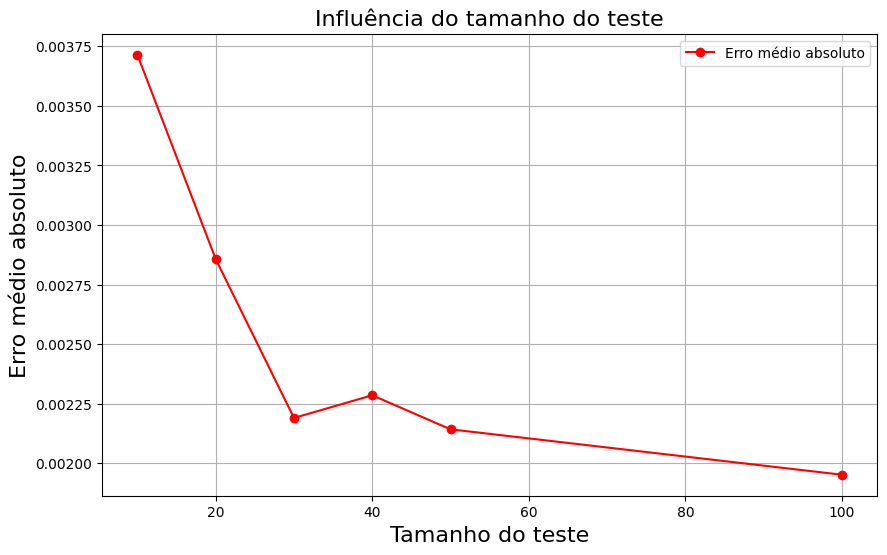

In [515]:
# Data
test_size = test_size_influence_dts1['test_size']  # Example test sizes
abs_error = test_size_influence_dts1['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts1.pdf')

# Display the plot
plt.show()

## DTS2

In [526]:
test_size_influence_dts2 = df_vgg[df_vgg['quantifier'] == 'EMQ']
test_size_influence_dts2 = test_size_influence_dts2[['abs_error', 'test_size']]

test_size_influence_dts2 = test_size_influence_dts2.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts2

,test_size,abs_error
0,10,0.021095
1,20,0.018048
2,30,0.017095
3,40,0.012810
4,50,0.010667
5,100,0.009476


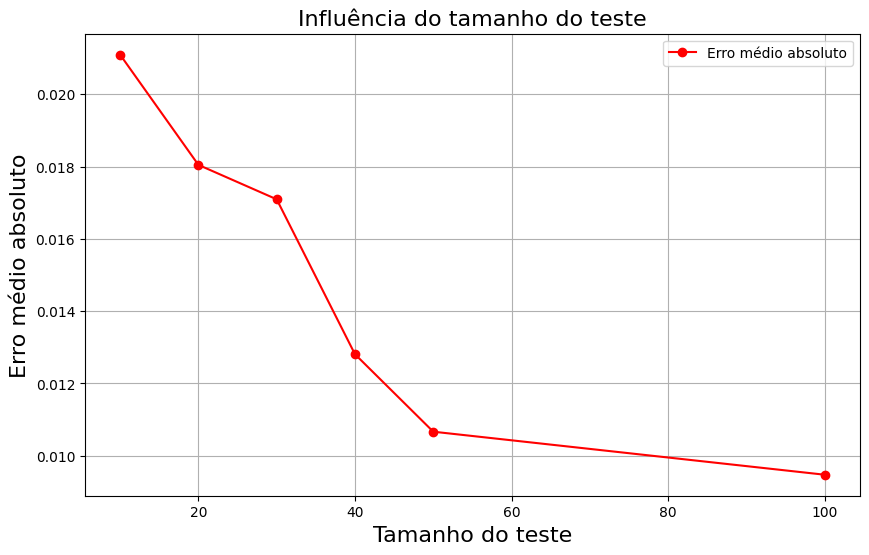

In [527]:
# Data
test_size = test_size_influence_dts2['test_size']  # Example test sizes
abs_error = test_size_influence_dts2['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts2.pdf')

# Display the plot
plt.show()

## DTS3

In [538]:
test_size_influence_dts3 = df_resnet[df_resnet['quantifier'] == 'EMQ']
test_size_influence_dts3 = test_size_influence_dts3[['abs_error', 'test_size']]

test_size_influence_dts3 = test_size_influence_dts3.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts3

,test_size,abs_error
0,10,0.003905
1,20,0.003714
2,30,0.003810
3,40,0.003095
4,50,0.002762
5,100,0.003048


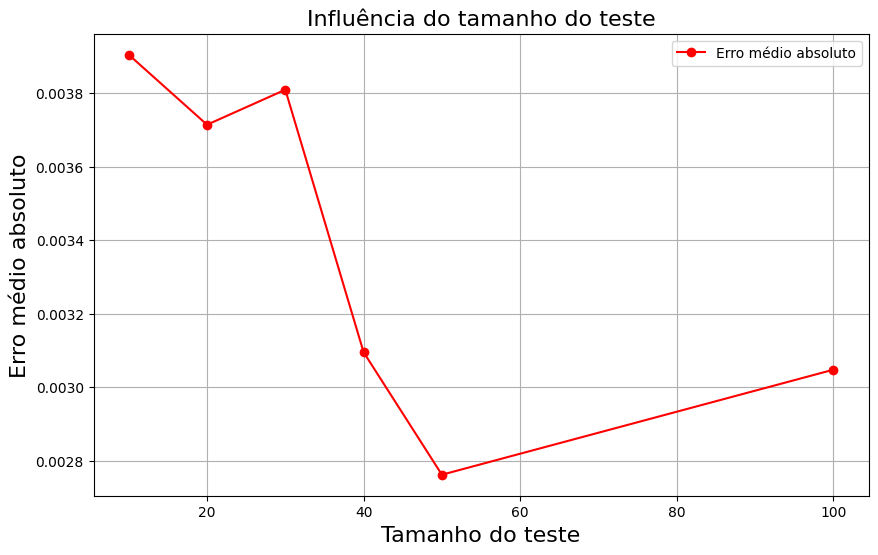

In [539]:
# Data
test_size = test_size_influence_dts3['test_size']  # Example test sizes
abs_error = test_size_influence_dts3['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts3.pdf')

# Display the plot
plt.show()

## DTS4

In [550]:
test_size_influence_dts4 = df_google[df_google['quantifier'] == 'EMQ']
test_size_influence_dts4 = test_size_influence_dts4[['abs_error', 'test_size']]

test_size_influence_dts4 = test_size_influence_dts4.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts4

,test_size,abs_error
0,10,0.073238
1,20,0.053571
2,30,0.048571
3,40,0.035619
4,50,0.034238
5,100,0.025190


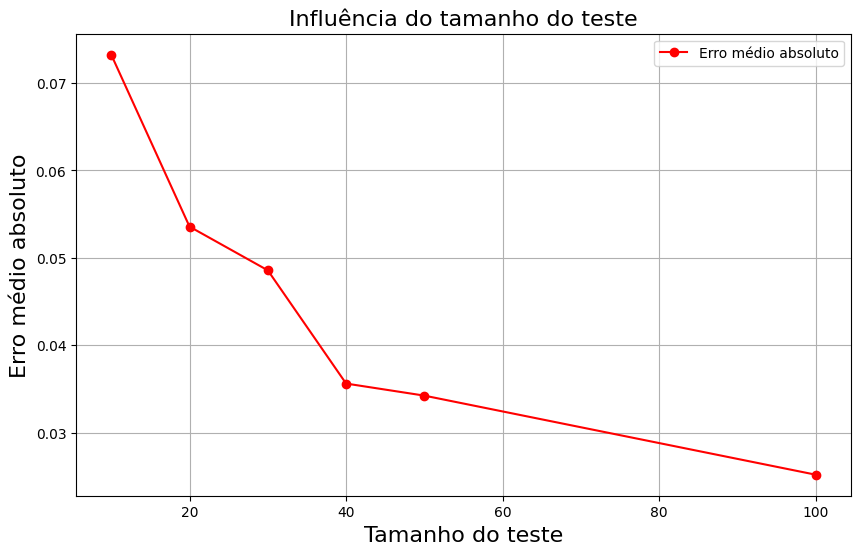

In [551]:
# Data
test_size = test_size_influence_dts4['test_size']  # Example test sizes
abs_error = test_size_influence_dts4['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts4.pdf')

# Display the plot
plt.show()

## DTS5

In [562]:
test_size_influence_dts5 = df_vgg[df_vgg['quantifier'] == 'EMQ']
test_size_influence_dts5 = test_size_influence_dts5[['abs_error', 'test_size']]

test_size_influence_dts5 = test_size_influence_dts5.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts5

,test_size,abs_error
0,10,0.022381
1,20,0.017429
2,30,0.018429
3,40,0.019762
4,50,0.016619
5,100,0.015667


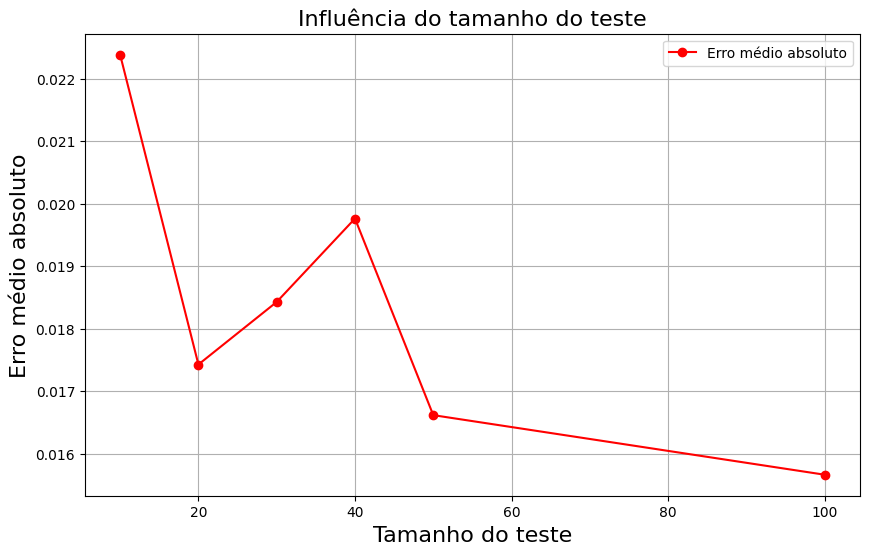

In [563]:
# Data
test_size = test_size_influence_dts5['test_size']  # Example test sizes
abs_error = test_size_influence_dts5['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts5.pdf')

# Display the plot
plt.show()

## DTS6

In [574]:
test_size_influence_dts6 = df_resnet[df_resnet['quantifier'] == 'EMQ']
test_size_influence_dts6 = test_size_influence_dts6[['abs_error', 'test_size']]

test_size_influence_dts6 = test_size_influence_dts6.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts6

,test_size,abs_error
0,10,0.230476
1,20,0.180667
2,30,0.145524
3,40,0.127714
4,50,0.125381
5,100,0.103333


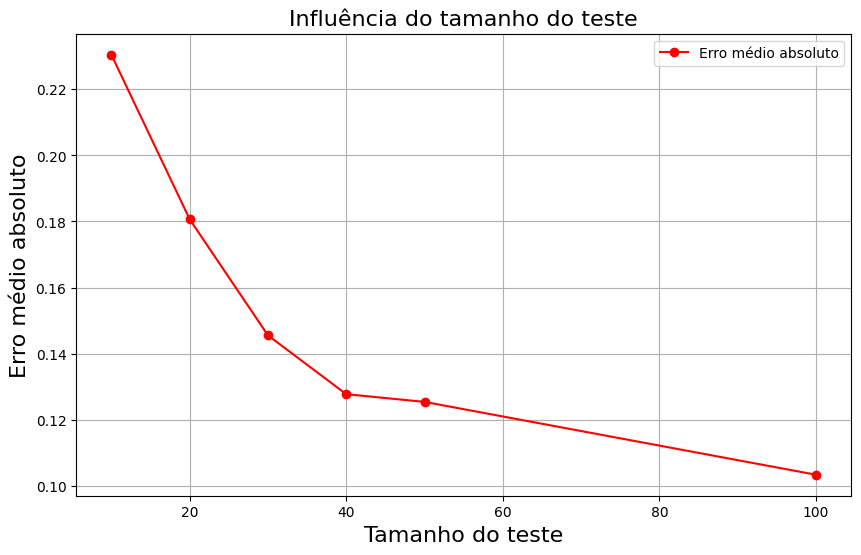

In [575]:
# Data
test_size = test_size_influence_dts6['test_size']  # Example test sizes
abs_error = test_size_influence_dts6['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts6.pdf')

# Display the plot
plt.show()

## DTS7

In [586]:
test_size_influence_dts7 = df_resnet[df_resnet['quantifier'] == 'EMQ']
test_size_influence_dts7 = test_size_influence_dts7[['abs_error', 'test_size']]

test_size_influence_dts7 = test_size_influence_dts7.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts7

,test_size,abs_error
0,10,0.112238
1,20,0.090238
2,30,0.071429
3,40,0.076905
4,50,0.070143
5,100,0.058762


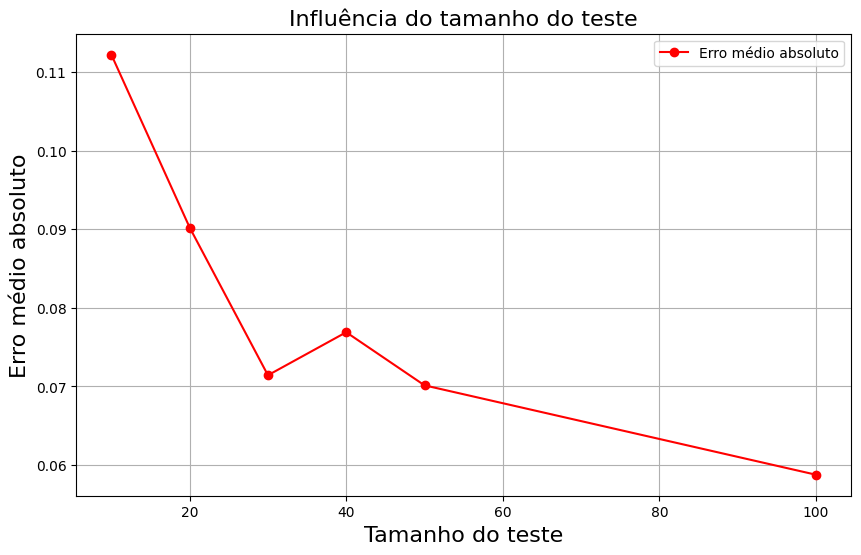

In [587]:
# Data
test_size = test_size_influence_dts7['test_size']  # Example test sizes
abs_error = test_size_influence_dts7['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts7.pdf')

# Display the plot
plt.show()

## DTS8

In [598]:
test_size_influence_dts8 = df_resnet[df_resnet['quantifier'] == 'EMQ']
test_size_influence_dts8 = test_size_influence_dts8[['abs_error', 'test_size']]

test_size_influence_dts8 = test_size_influence_dts8.groupby('test_size')['abs_error'].mean().reset_index()
test_size_influence_dts8

,test_size,abs_error
0,10,0.008095
1,20,0.008333
2,30,0.006286
3,40,0.009095
4,50,0.008571
5,100,0.008286


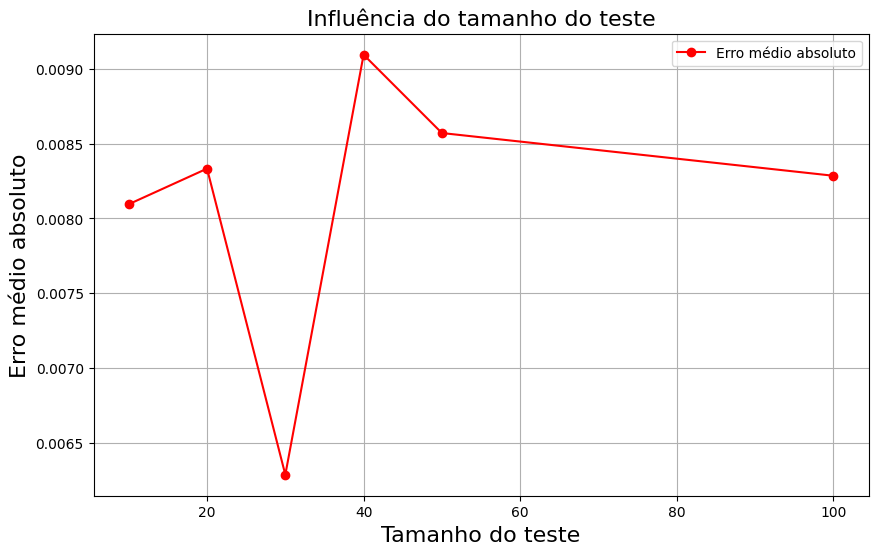

In [599]:
# Data
test_size = test_size_influence_dts8['test_size']  # Example test sizes
abs_error = test_size_influence_dts8['abs_error']  # Corresponding absolute errors

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(test_size, abs_error, marker='o', linestyle='-', color='red', label='Erro médio absoluto')  # Line plot

# Customize the plot
plt.xlabel('Tamanho do teste', fontsize=16)
plt.ylabel('Erro médio absoluto', fontsize=16)
plt.title('Influência do tamanho do teste', fontsize=16)
plt.legend()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('test_influence_dts8.pdf')

# Display the plot
plt.show()

# Box plot ranking CNNs

In [3]:
models = ['GoogleNet', 'ResNet50', 'VGG16']

cnn_ranking = pd.read_csv('./rankingCNNs.csv')
cnn_data = {}

for model in models:
    cnn_data[model] = cnn_ranking[cnn_ranking['Method'] == model]['Rank'].tolist()

cnn_ranking_df = pd.DataFrame(cnn_data)
cnn_ranking_df

,GoogleNet,ResNet50,VGG16
0,1.50,1.50,2.83
1,1.25,2.17,2.58
2,1.42,1.67,2.83
3,1.92,1.25,3.00
4,1.77,2.75,1.17
5,1.67,1.33,1.75
6,2.00,1.17,2.83
7,1.92,1.17,2.67


In [4]:
mean_rank_cnn_sorted = cnn_ranking_df.mean().round(3).sort_values()
mean_rank_cnn_sorted

ResNet50     1.626
GoogleNet    1.681
VGG16        2.458
dtype: float64

In [5]:
cnn_ranking_df = cnn_ranking_df[mean_rank_cnn_sorted.index]
cnn_ranking_df

,ResNet50,GoogleNet,VGG16
0,1.50,1.50,2.83
1,2.17,1.25,2.58
2,1.67,1.42,2.83
3,1.25,1.92,3.00
4,2.75,1.77,1.17
5,1.33,1.67,1.75
6,1.17,2.00,2.83
7,1.17,1.92,2.67


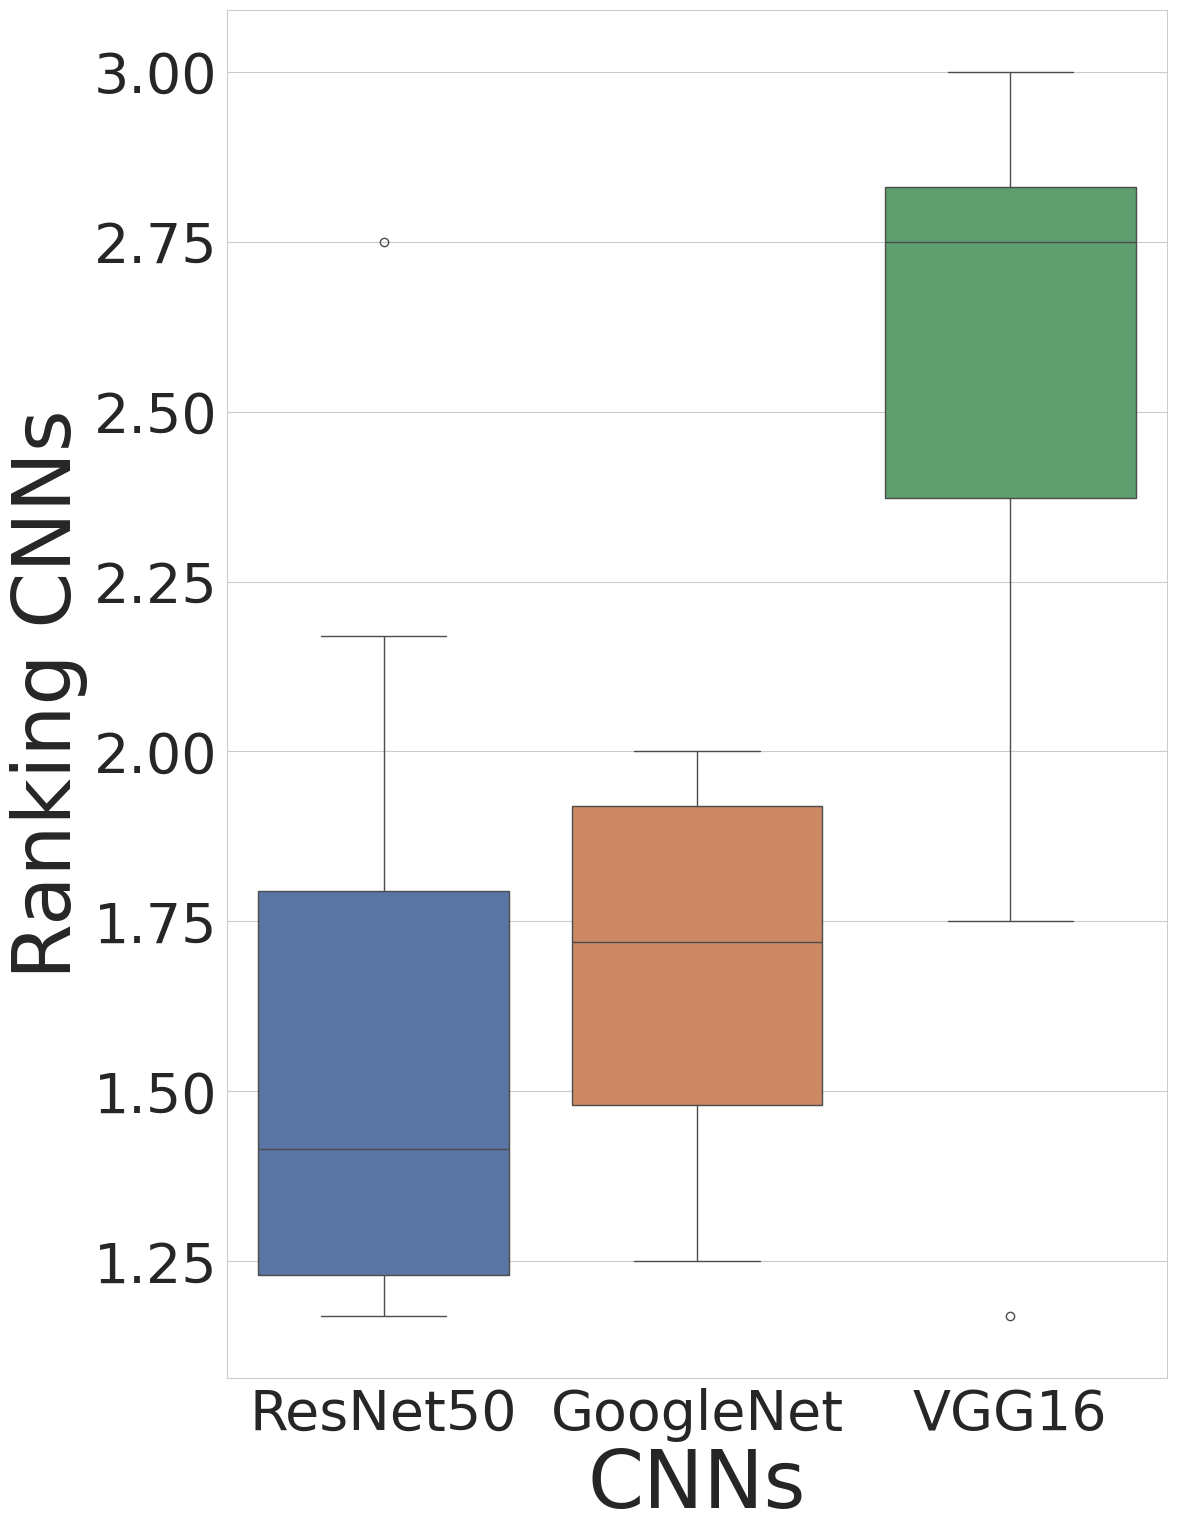

In [17]:
sample = cnn_ranking_df
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .23
plt_width = 10
plt_heigth = 18
plot_rotation = 75
axis_font_size = 40
labels_size = 58

with sns.axes_style("whitegrid"), sns.color_palette('deep', cnn_ranking_df.shape[1]):
    plt.figure(figsize=(plt_width,plt_heigth))
    plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
    ax=sns.boxplot(data=sample)
    plt.xticks(fontsize = axis_font_size)
    plt.yticks(fontsize = axis_font_size)
    ax.set_xlabel("CNNs",fontsize=labels_size)
    ax.set_ylabel("Ranking CNNs",fontsize=labels_size)

plt.show()
# plt.savefig('ranking_mae_quantifiers.pdf')